# NB2.2A Regularized Models

In [1]:
#Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.datasets import load_svmlight_file
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, KFold, cross_val_predict

Prof. Noah Smith’s research group studied the 10-K reports that companies file with the Securities and Exchange Comission (SEC) in the United States. This filing is mandated by law for all publicly traded companies. The goal of their study was to predict, based on this piece of public information, what the future volatility of the company's stock would be [[1](https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/regression.html), [2](http://www.cs.cmu.edu/~ark/10K/)].   

The dataset provided (`/data/E2006.train`) has  16,087 examples available. The features, which have already been preprocessed for us, correspond to different words, 150,360 in total (*Corpus* [[4](https://en.wikipedia.org/wiki/Text_corpus)]). Thus, we have many more features than examples.

In [2]:
# Carga de Archivos
data, target = load_svmlight_file("data/E2006.train")

In [3]:
x_train, x_test, y_train, y_test = train_test_split(data,target, train_size = .80)

**T1** Create, fit and evaluate Linear Regression Model (Ordinary-Least Square) to the dataset. Evaluate the model using the Holdout Method (80% Train and 20% Test). Print the RMSE and R2 for the train and test set.

What can you observe?

After doing the operations, we can notice that in the RMSE from the train set, it is near 0, and R2 close to 1 something that means the model fits the data well and has a good peroformance, nevertheless, in test set those metrics are so different from the latter ones, the R2 is closer to 0 and RMSE is nothing like train RMSE, so the model has a bad generaliation, which means has overfitting.

In [4]:
reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

##### Train set

In [5]:
y_predicted = reg.predict(x_train)
np.sqrt(mean_squared_error(y_train, y_predicted))

0.0003711884393239886

In [6]:
r2_score(y_train, y_predicted)

0.9999996512475272

##### Test set

In [7]:
y_predicted = reg.predict(x_test)
np.sqrt(mean_squared_error(y_test, y_predicted))

0.5693447536379865

In [8]:
r2_score(y_test, y_predicted)

0.22563127197594135

#### Y predict

In [9]:
y_predicted_linear = reg.predict(data)

In [10]:
y_predicted_linear.shape

(16087,)

A better estimate of the model performance can be obtained using a *K-Fold Cross-Validation*.

**T2** Evaluate the model with a 5-Fold Cross Validation. Print the RMSE and R2. 
>Use the method `cross_val_predict()` [[Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html)].

In [11]:
y_pred = cross_val_predict(reg, data, target, cv=5)

In [12]:
np.sqrt(mean_squared_error(target, y_pred))

0.7545136965833141

In [13]:
r2_score(target, y_pred)

-0.4240250459635413

Note that the coefficient of determination ($R^2$) is negative!. This would indicate that we would obtain better predictions if we used the mean of the values to predict the target variable. This situation is common when you have more input variables than records. **Overfitting!** 

We can use regularization in order to create a better model.

**T3** Create, fit and evaluate an ElasticNet Regression Model to the dataset ($\alpha = 0.1$ and $l1_{ration} = 0.5$). Evaluate the model using:
* Holdout Method (80% Train and 20% Test). Print the RMSE and R2 for the train and test set.
* 5-Fold Cross Validation. Print the RMSE and R2.

>Use the method `cross_val_predict()` [[Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html)].

In [14]:
Elastic_regression = linear_model.ElasticNet(alpha = 0.1, l1_ratio = 0.5)

In [15]:
Elastic_regression.fit(x_train, y_train)

ElasticNet(alpha=0.1)

#### Train set

In [16]:
y_predicted_elastic = Elastic_regression.predict(x_train)
np.sqrt(mean_squared_error(y_train, y_predicted_elastic))

0.39277832960696274

In [17]:
r2_score(y_train, y_predicted_elastic)

0.6094978314427174

#### Test set

In [18]:
y_predicted_elastic = Elastic_regression.predict(x_test)
np.sqrt(mean_squared_error(y_test, y_predicted_elastic))

0.4137175906579511

In [19]:
r2_score(y_test, y_predicted_elastic)

0.5911112763964002

#### Y predict

In [20]:
y_predicted_elastic = Elastic_regression.predict(data)

### 5-Fold Cross Validation.

In [21]:
y_pred = cross_val_predict(Elastic_regression, data, target, cv=5)

In [22]:
np.sqrt(mean_squared_error(target, y_pred))

0.3967420770053747

In [23]:
r2_score(target, y_pred)

0.6062687394562409

Scikit-Learn provides classes which encapsulate an inner cross-validation loop to optimize the necessary penalty parameter for Lasso, Ridge and ElasticNet Models (LassoCV, RidgeCV, ElasticNetCV).  

**T4** Use `ElasticNetCV`to identify the optimal values of $\alpha$ and $\rho$ (`l1_ratio`). 
Complete the following:
* Find the optimal hyperparameter considering the following values:
```
alphas = (0.1, 0.01, 0.005, 0.0025, 0.001), 
l1_ratio=(0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99)
```
* Print the optimal values (`alpha` and `l1_ratio_`).
* Evaluate the model using 5-Fold Cross Validation. Print the RMSE and R2.

>`ElasticNetCV()` [[Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNetCV.html)].
`ElasticNetCV()` has `alpha_`and `l1_ratio_` as attributes.

In [24]:
alphas = (0.1, 0.01, 0.005, 0.0025, 0.001), 
l1_ratio=(0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99)

In [25]:
elasticnet_cv = linear_model.ElasticNetCV(alphas = alphas, l1_ratio = l1_ratio, cv = 5)

In [26]:
elasticnet_cv.fit(data, target)

ElasticNetCV(alphas=((0.1, 0.01, 0.005, 0.0025, 0.001),), cv=5,
             l1_ratio=(0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99))

In [27]:
elasticnet_cv.alpha_

0.1

In [28]:
elasticnet_cv.l1_ratio_

0.01

In [29]:
Elastic_reg = linear_model.ElasticNet(alpha = elasticnet_cv.alpha_, l1_ratio = elasticnet_cv.l1_ratio_)

In [30]:
y_pred = cross_val_predict(Elastic_reg, data, target, cv=5)

In [31]:
np.sqrt(mean_squared_error(target, y_pred))

0.3891036843606234

In [32]:
r2_score(target, y_pred)

0.6212836471355219

In [33]:
# y_predict_elastic_v2 = Elastic_reg.predict(data) y_predicted_elastic

**T5** Make the visualization of the prediction values $\hat{y}$ versus real values $y$.

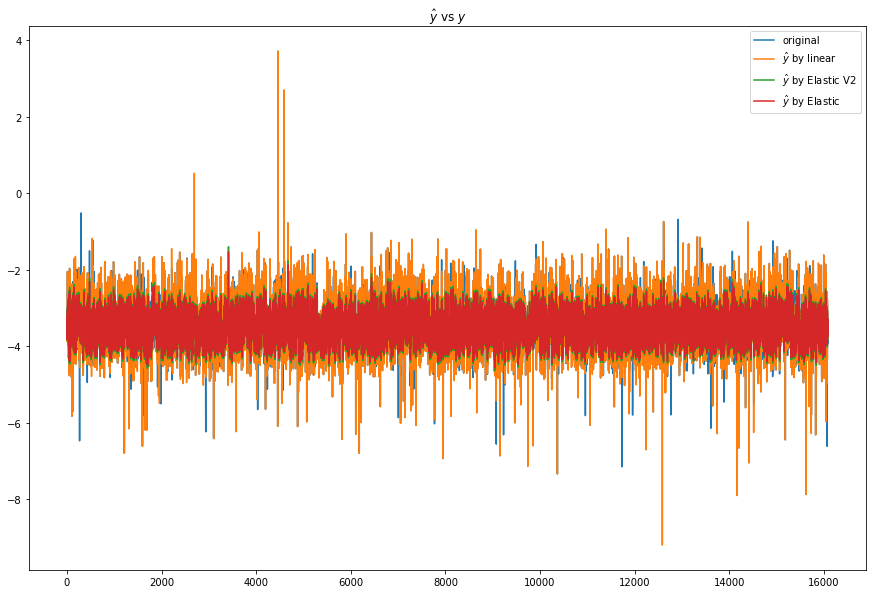

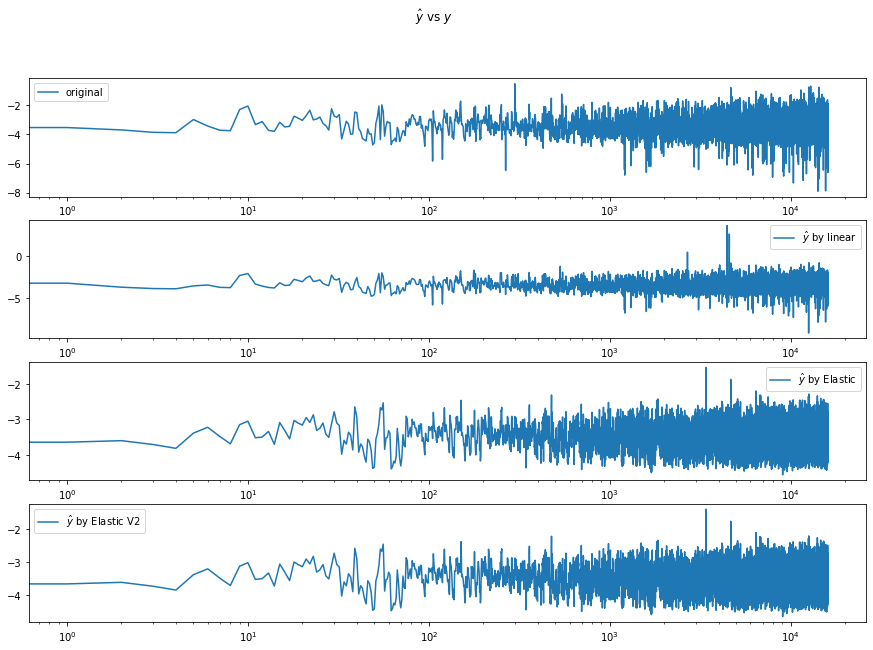

In [34]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(range(len(target)), target, label = "original")
ax.plot(range(len(y_predicted_linear)), y_predicted_linear, label = "$\hat{y}$ by linear")
ax.plot(range(len(y_pred)), y_pred, label = "$\hat{y}$ by Elastic V2")
ax.plot(range(len(y_predicted_elastic)), y_predicted_elastic, label = "$\hat{y}$ by Elastic")
ax.set_title("$\hat{y}$ vs $y$")
ax.legend()
plt.show()

fig, (ax, ax2, ax3, ax4) = plt.subplots(nrows=4, figsize=(15,10))

ax.plot(range(len(target)), target, label = "original")
ax2.plot(range(len(y_predicted_linear)), y_predicted_linear, label = "$\hat{y}$ by linear")
ax3.plot(range(len(y_predicted_elastic)), y_predicted_elastic, label = "$\hat{y}$ by Elastic")
ax4.plot(range(len(y_pred)), y_pred, label = "$\hat{y}$ by Elastic V2")
fig.suptitle("$\hat{y}$ vs $y$")

ax.legend()
ax2.legend()
ax3.legend()
ax4.legend()

ax.set_xscale('log')
ax2.set_xscale('log')
ax3.set_xscale('log')
ax4.set_xscale('log')

plt.show()

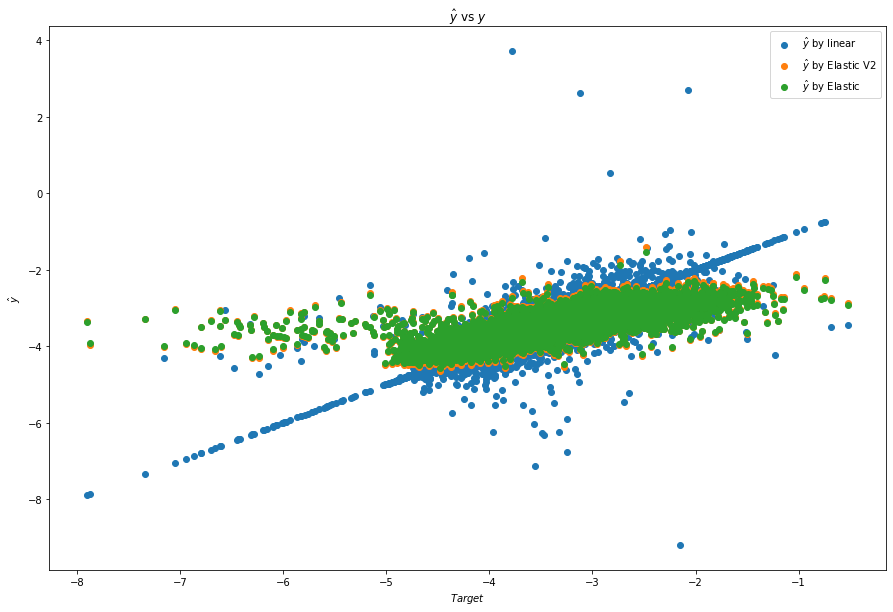

In [35]:
fig, ax = plt.subplots(figsize=(15,10))
# ax.scatter(, , label = "original")
ax.scatter(target, y_predicted_linear, label = "$\hat{y}$ by linear")
ax.scatter(target, y_pred, label = "$\hat{y}$ by Elastic V2")
ax.scatter(target, y_predicted_elastic, label = "$\hat{y}$ by Elastic")
ax.set_title("$\hat{y}$ vs $y$")

ax.set_xlabel('$Target$')
ax.set_ylabel('$\hat{y}$')

ax.legend()
plt.show()